In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
from kernels import rbf, periodic, exp, linear
from gpr import train_test_split, gpr
from aquisitions import UCB, PI, EI

In [16]:
def objective(x):
    return 2 * np.sin(x) + 3 * np.cos(2 * x) + 5 * np.sin(2 / 3 * x)

In [17]:
n = 10000
data_x = np.linspace(0, 4 * np.pi, n)
data_y = objective(data_x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.9997)

In [27]:
def plot_bo(mu, var, trial, x_new, y_new):
    plt.figure(figsize=(24, 8))
    plt.title('Bayesian Optimization', fontsize=20)
    plt.ylim(-6, 10)
    plt.plot(data_x, data_y, label='objective')
    
    std = np.sqrt(np.abs(var))
    plt.plot(data_x, mu, label='mean')
    plt.fill_between(
        data_x,
        mu + 2 * std,
        mu - 2 * std,
        color='turquoise',
        alpha=.2,
        label='standard deviation')
    plt.scatter(x_new, y_new, color='blue', label='next x')
    plt.legend(
        loc='lower left',
        fontsize=12)
    plt.savefig(f'bo_{trial}.png')

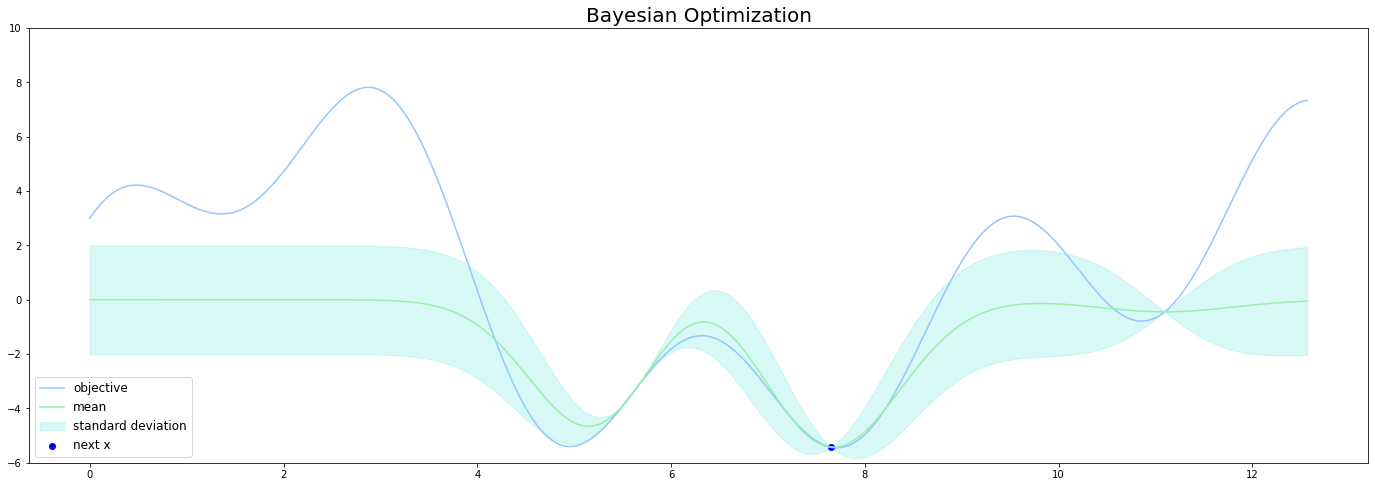

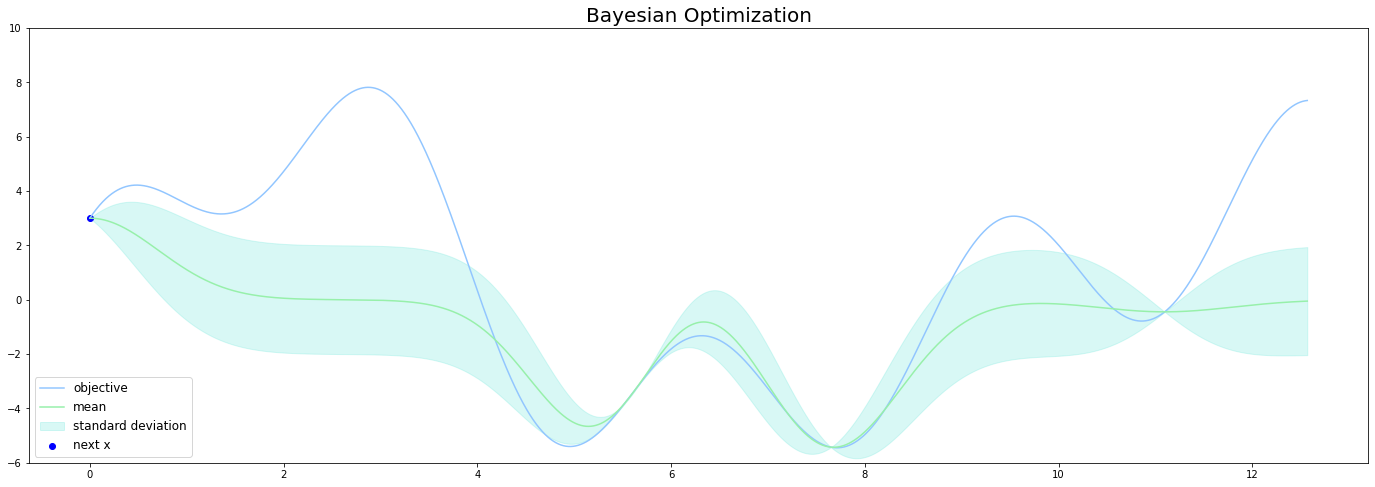

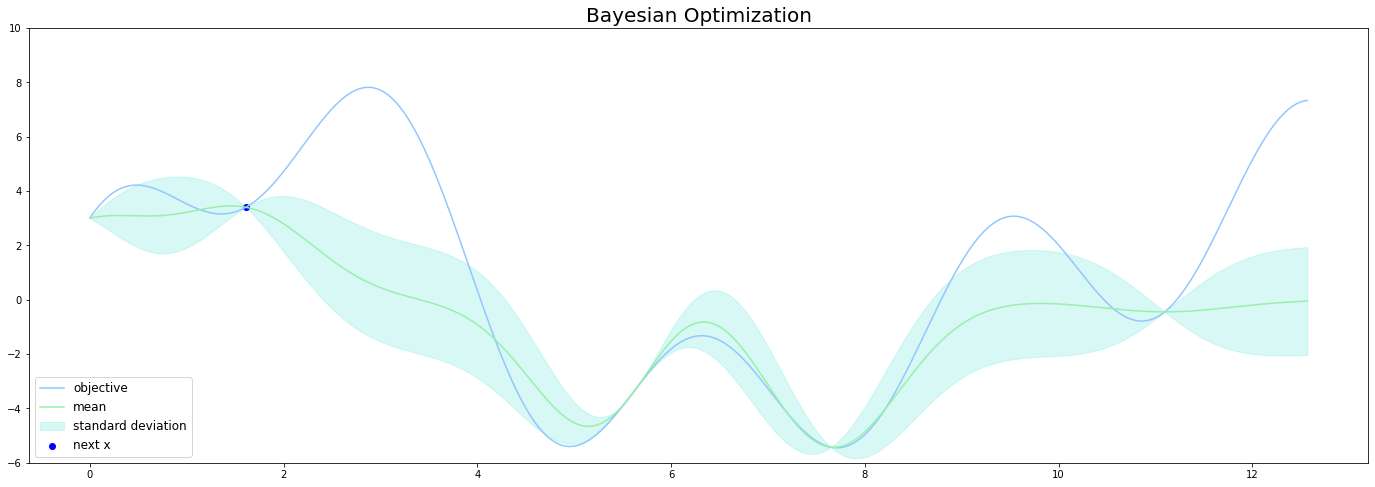

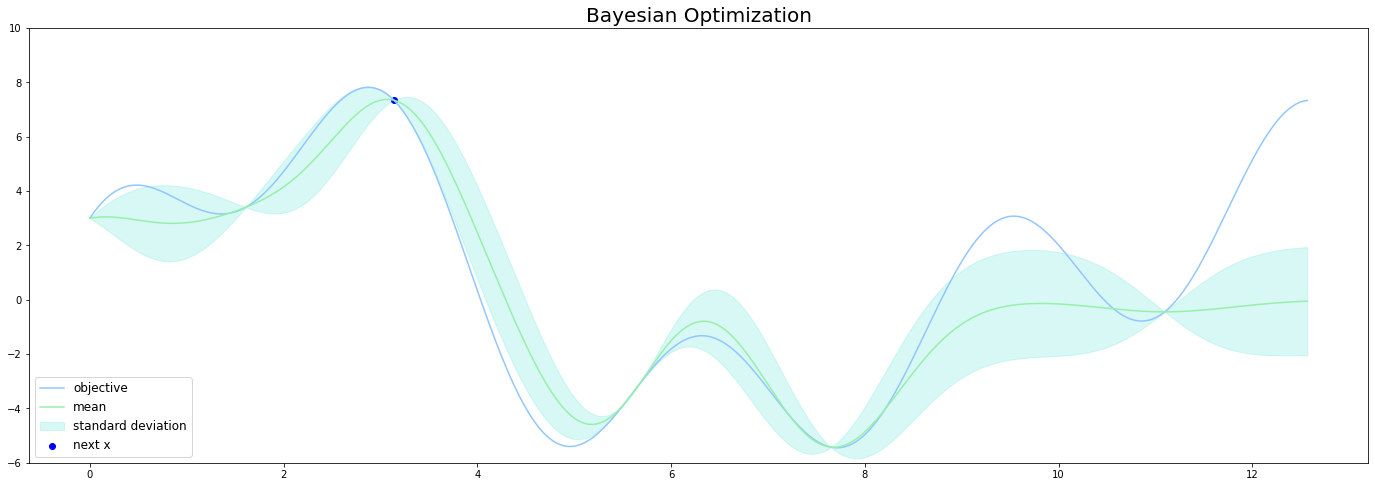

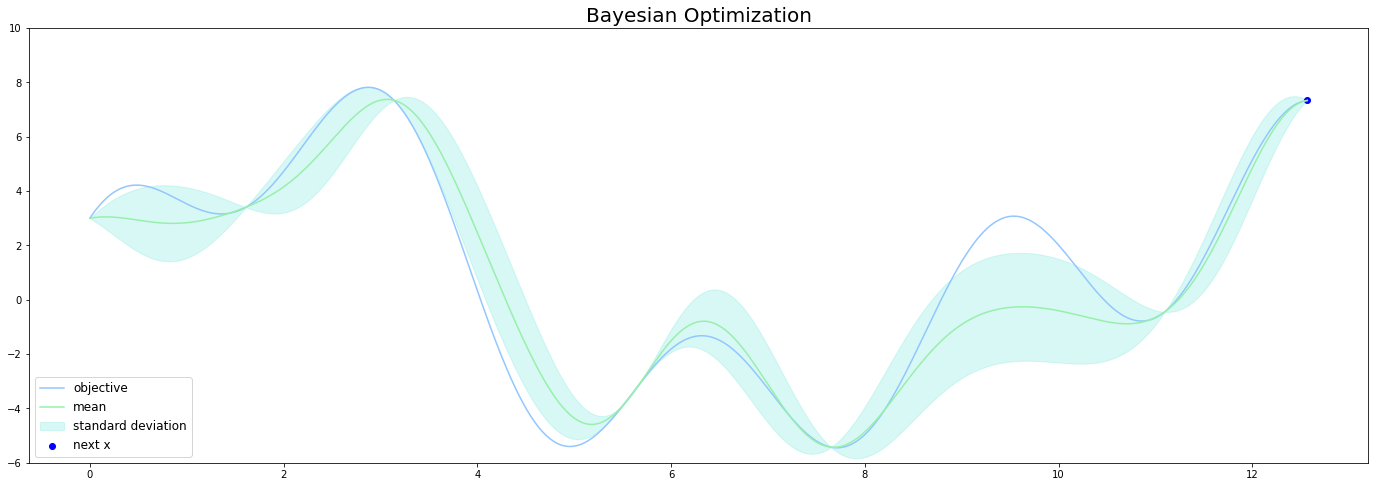

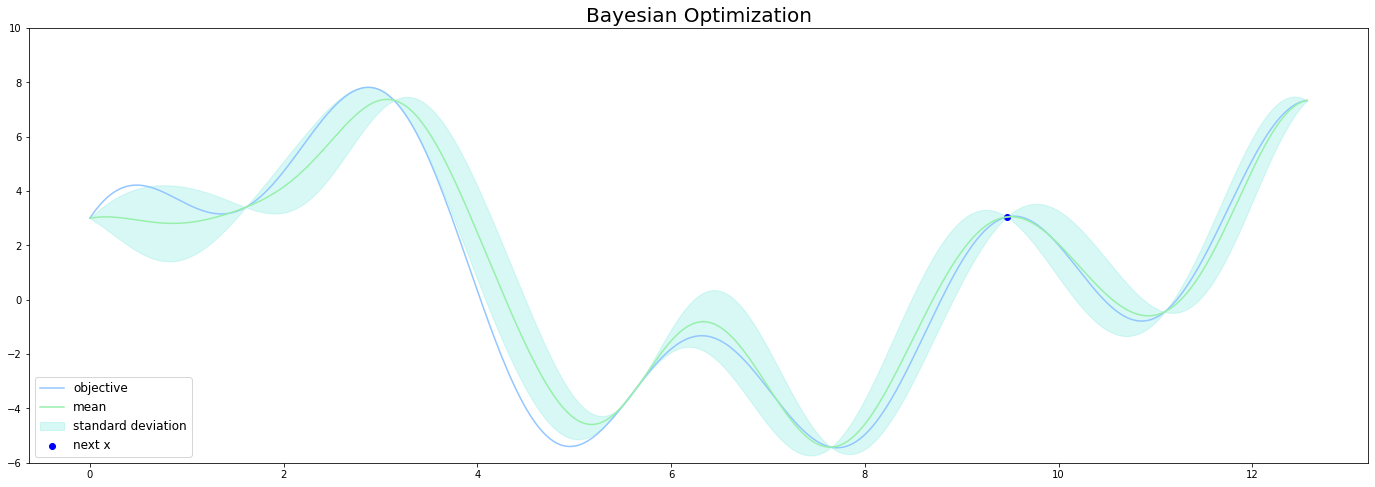

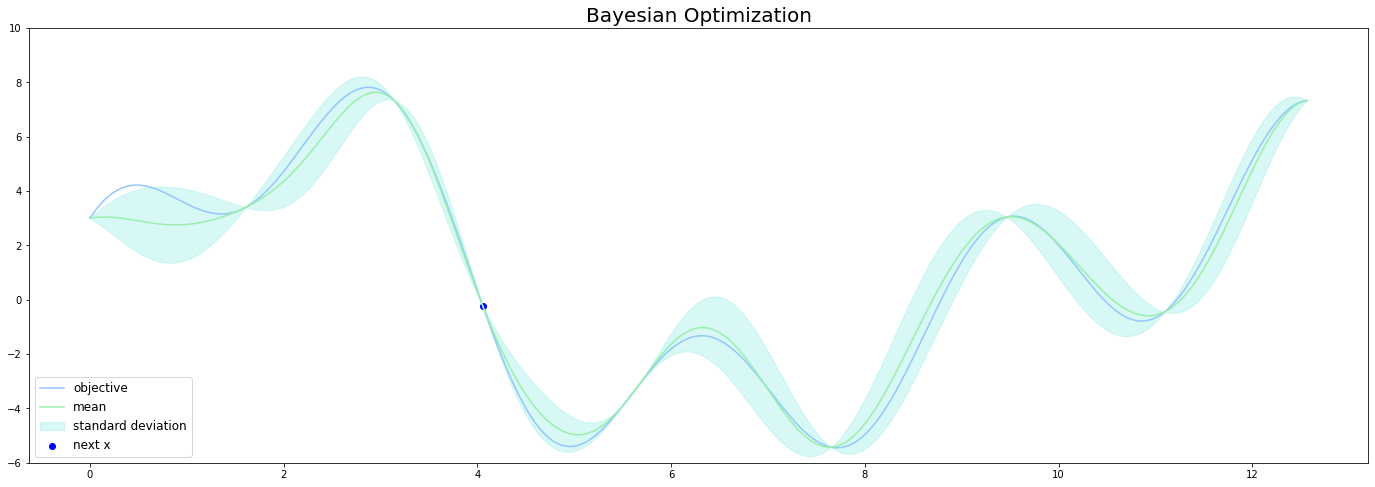

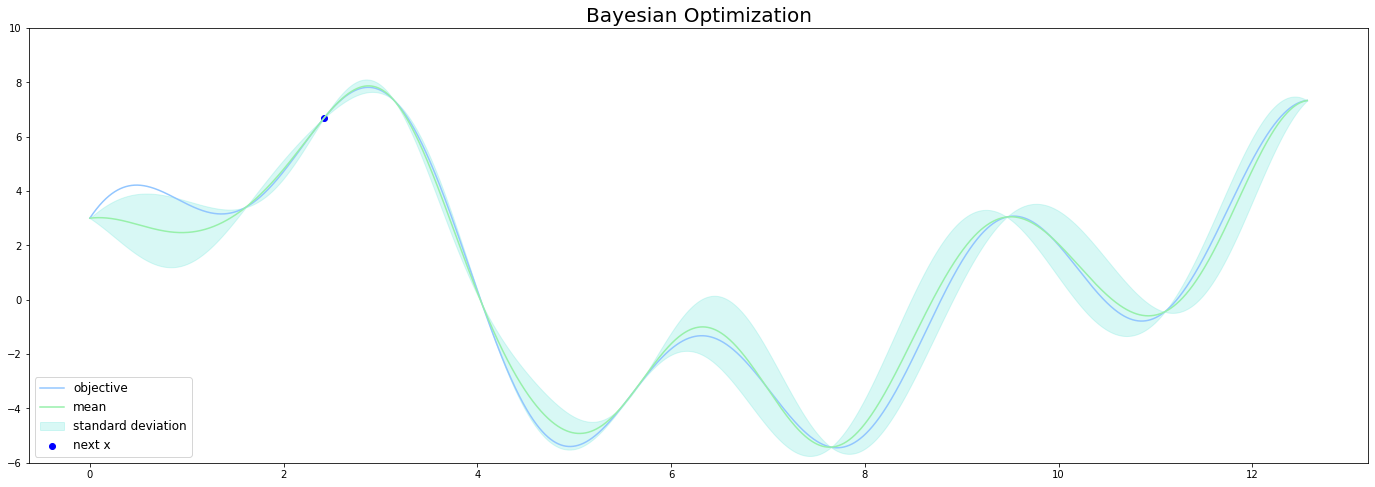

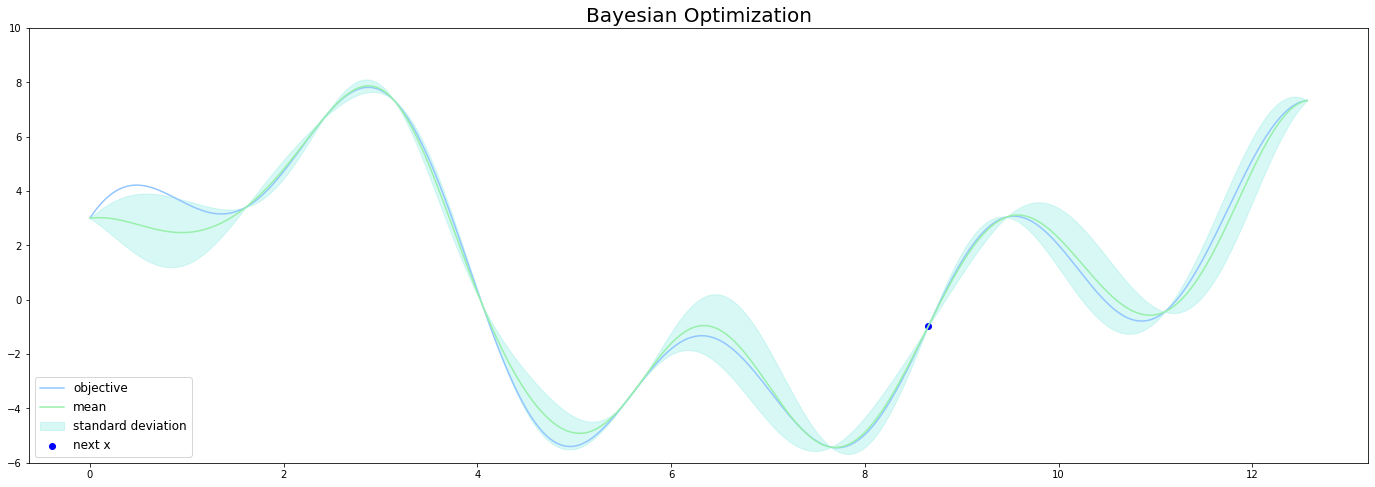

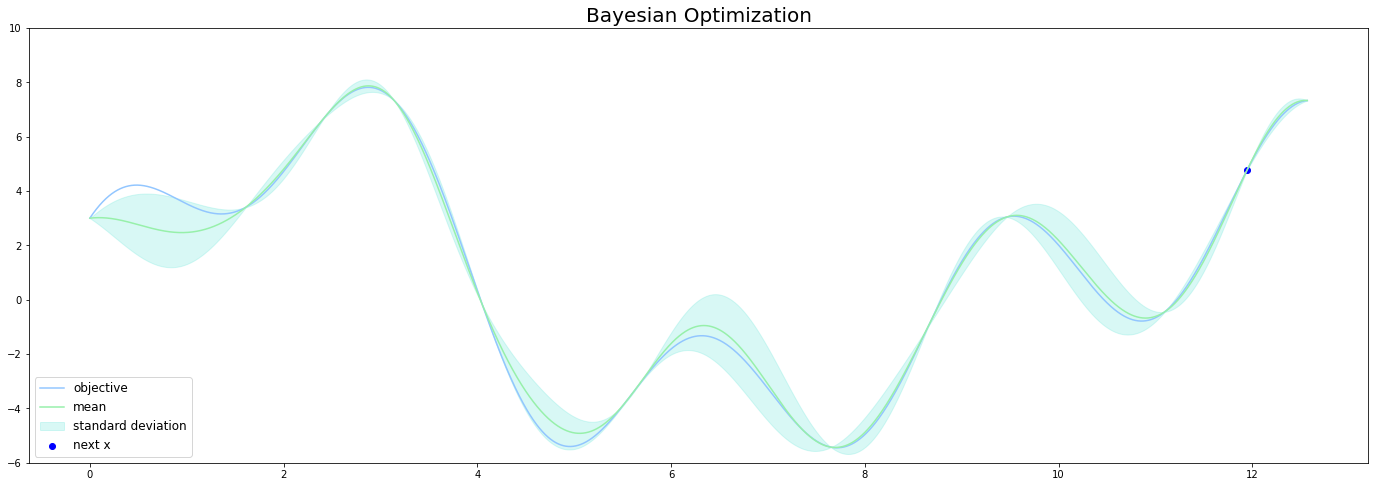

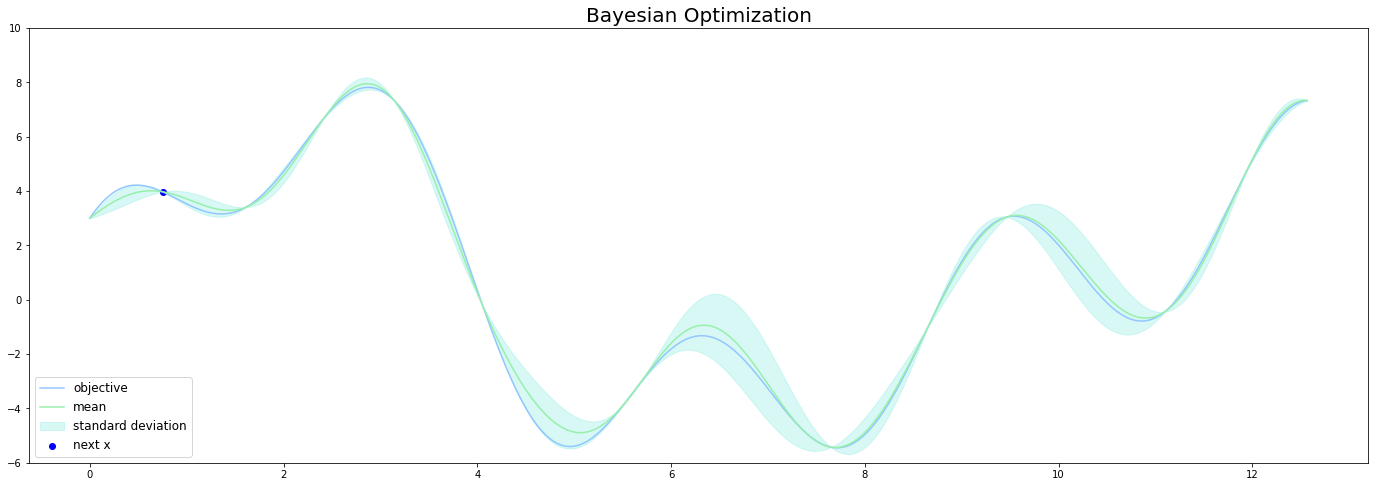

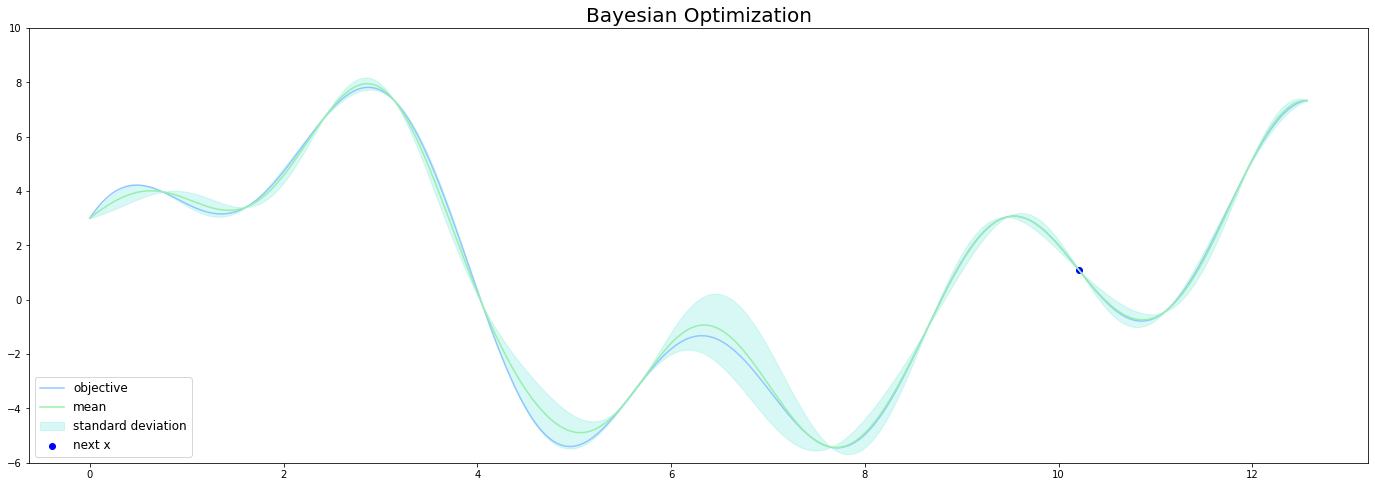

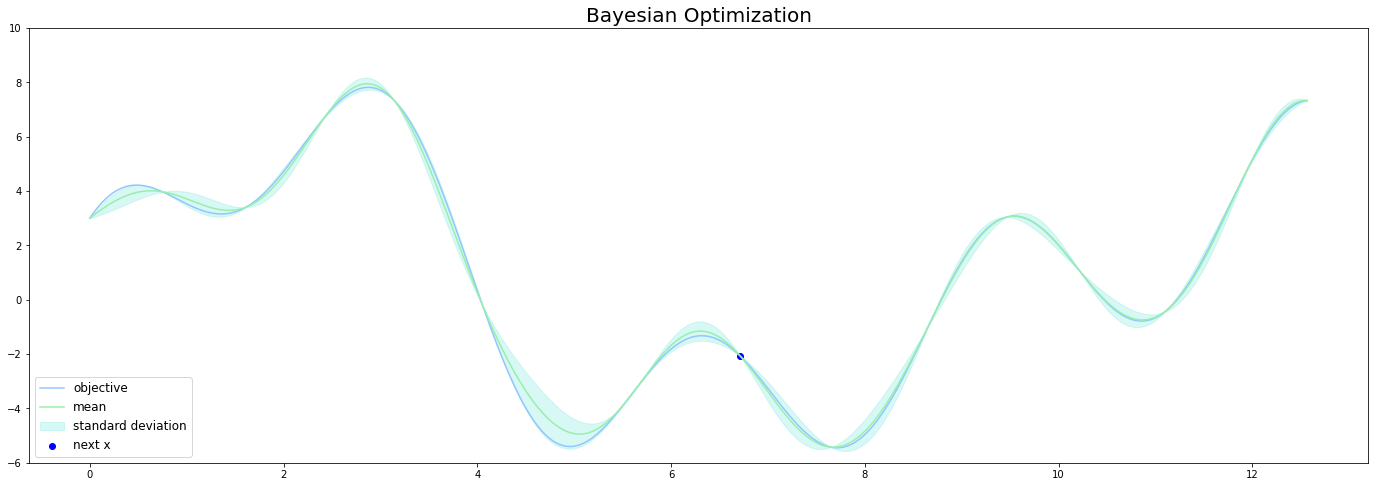

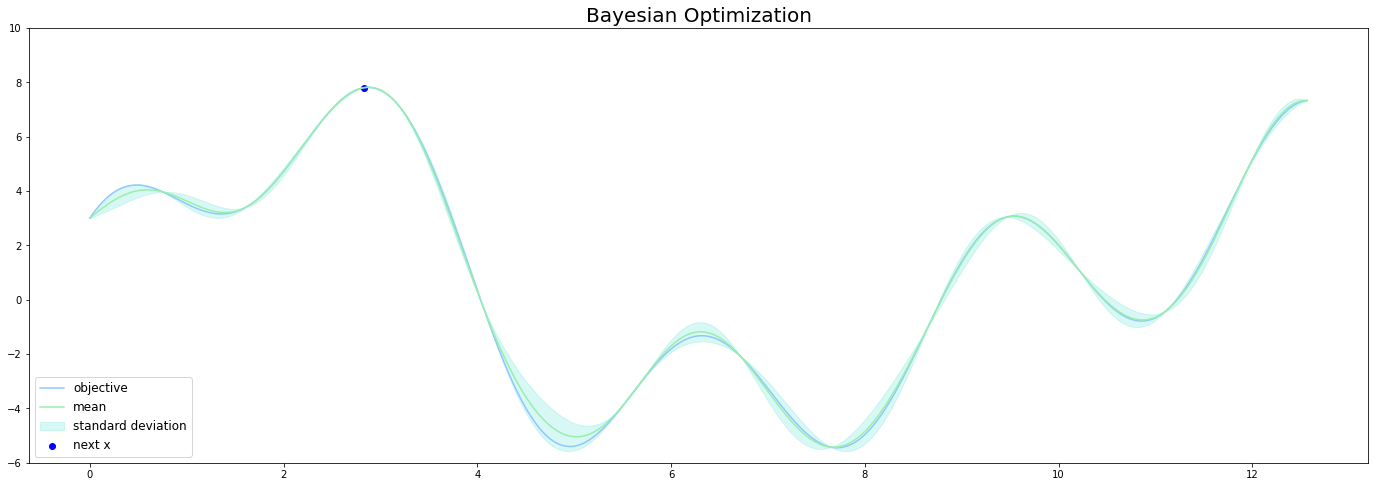

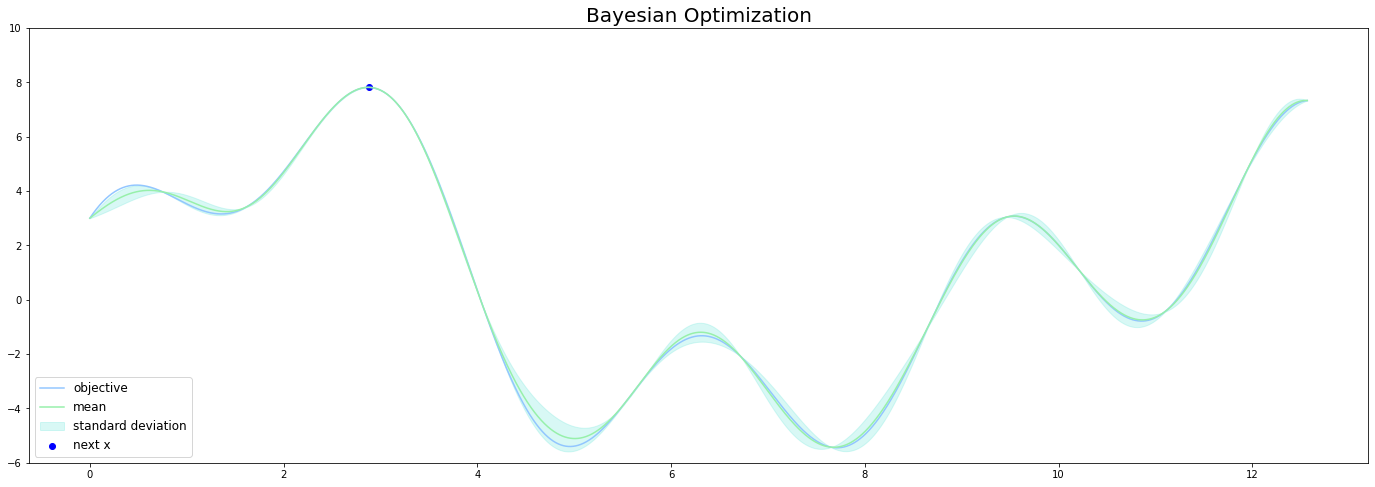

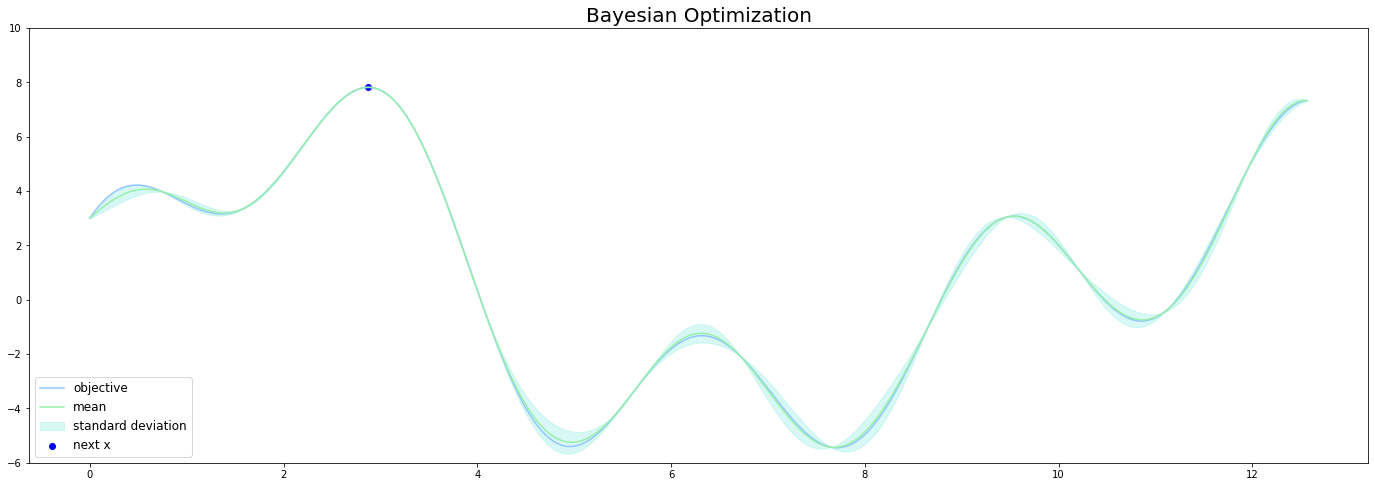

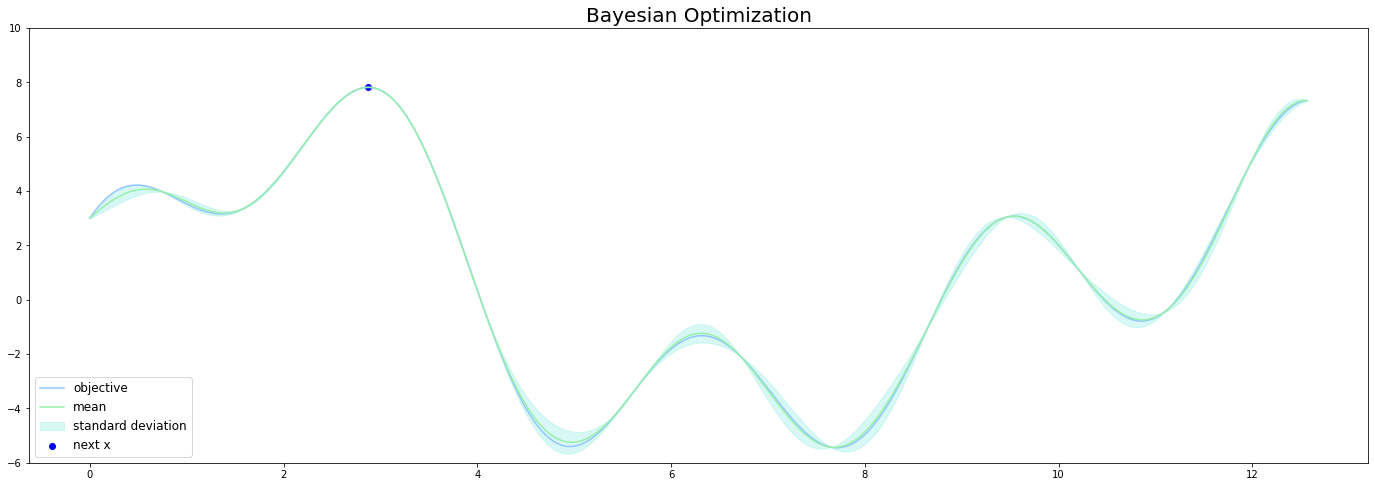

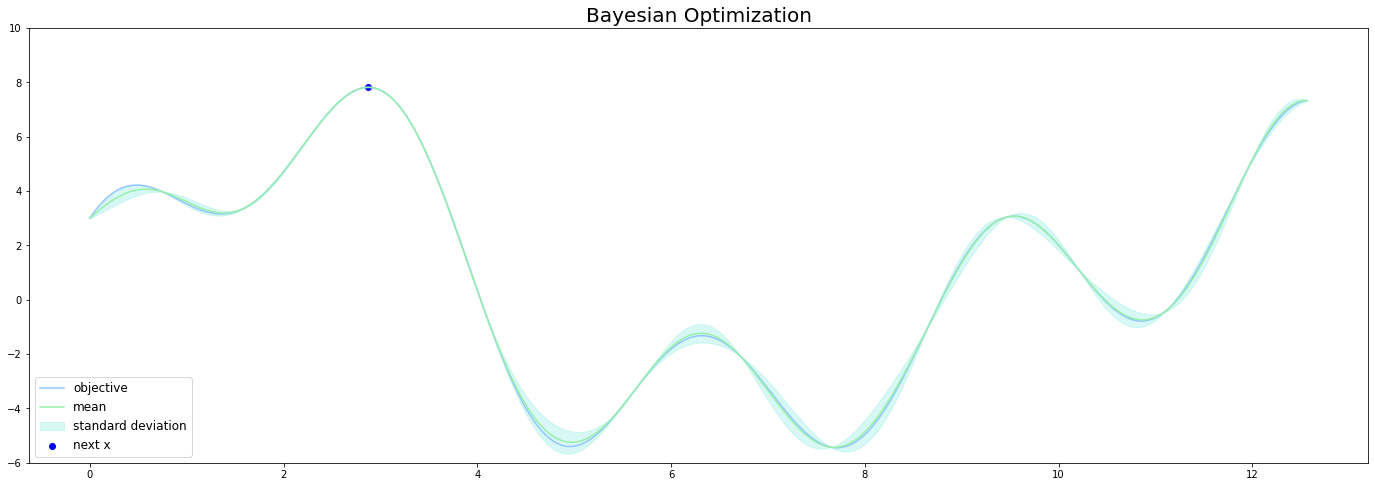

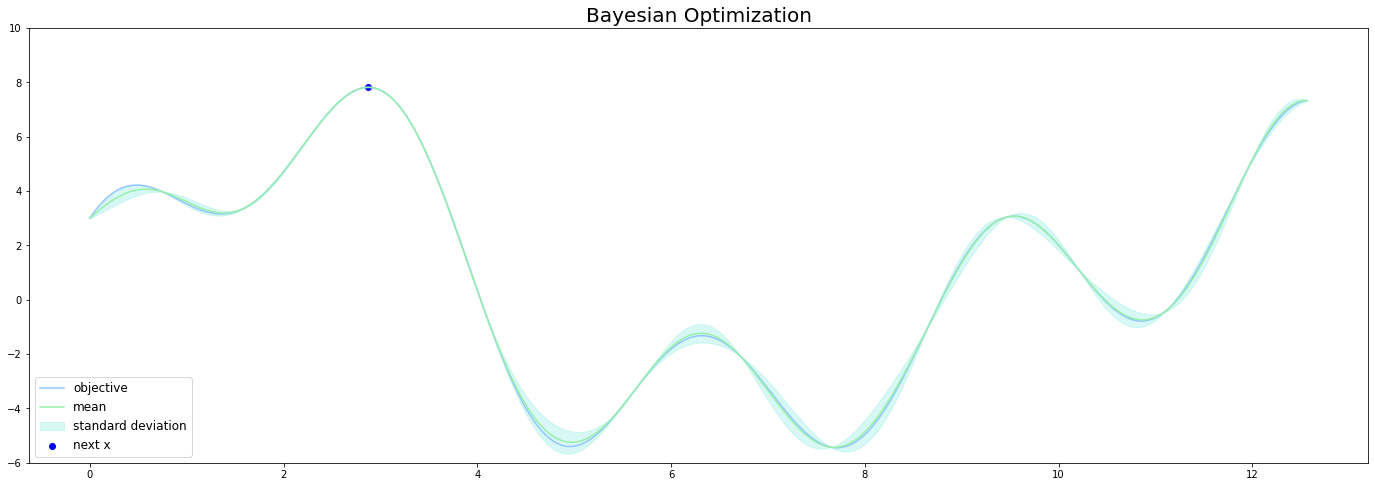

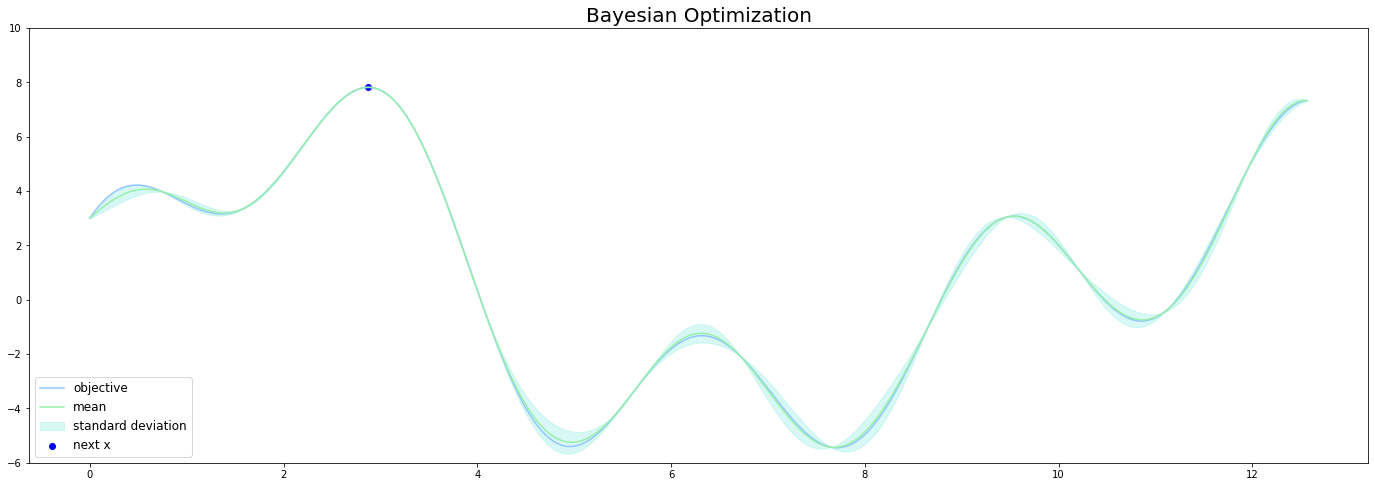

In [31]:
n_trials = 20


def kernel(x, x_prime):
    return rbf(x, x_prime, theta_1=1.0, theta_2=1.0)


# Upper Confidence Bound
def UCB(mu, var):
    k = 20.0
    return mu + k * var


def bayes_opt(x_train, y_train, data_x, objective, n_trials, kernel):

    mu, var = gpr(x_train, y_train, data_x, kernel)

    for trial in range(n_trials):
        ucb = UCB(mu, var)
        arg_max = np.argmax(ucb)

        x_new = data_x[arg_max]
        y_new = objective(data_x[arg_max])

        if(x_new not in x_train):
            x_train = np.hstack([x_train, x_new])
            y_train = np.hstack([y_train, y_new])

        mu, var = gpr(x_train, y_train, data_x, kernel)
        plot_bo(mu, var, trial, x_new, y_new)

bayes_opt(x_train, y_train, data_x, objective, n_trials, kernel)

In [32]:
from PIL import Image
#画像を入れる箱を準備
pictures=[]
#画像を箱に入れていく
for i in range(n_trials):
    pic_name='bo_' +str(i)+ '.png'
    img = Image.open(pic_name)
    pictures.append(img)
#gifアニメを出力する
pictures[0].save('bo.gif',save_all=True, append_images=pictures[1:],
optimize=False, duration=500, loop=0)